In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [2]:
#obtener tus propias credenciales de desarrollador de Spotify
client_id = "0e8516718fbb433f847c54fe4786f171"
client_secret = "8803d921337b47949afc64de38e7a6d4"


In [3]:
# Authenticate
credentials = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=credentials)

In [4]:
# Get the Top 50 Global playlist
playlist_id = '37i9dQZEVXbMDoHDwVN2tF'  # ID of the Top 50 Global playlist
results = sp.playlist_tracks(playlist_id)

In [5]:
# Extract song information
tracks = results['items']
song_names = []
artist_names = []
album_names = []
release_dates = []
popularity = []

for i in range(len(tracks)):
    track = tracks[i]['track']
    song_names.append(track['name'])
    artist_names.append(track['artists'][0]['name'])
    album_names.append(track['album']['name'])
    release_dates.append(track['album']['release_date'])
    popularity.append(track['popularity'])

In [6]:
# Create a Pandas DataFrame
df = pd.DataFrame({
    'Song Name': song_names,
    'Artist Name': artist_names,
    'Album Name': album_names,
    'Release Date': release_dates,
    'Popularity': popularity
})

# Save the DataFrame to a CSV file
df.to_csv('top_50_global_songs.csv', index=False)

print("el csv se ha creado exitosamente.")

el csv se ha creado exitosamente.


In [7]:
#leemos la base de datos y mostramos el dataframe

import pandas as pd
df = pd.read_csv('top_50_global_songs.csv')
df

,Song Name,Artist Name,Album Name,Release Date,Popularity
0,Die With A Smile,Lady Gaga,Die With A Smile,2024-08-16,92
1,BIRDS OF A FEATHER,Billie Eilish,HIT ME HARD AND SOFT,2024-05-17,100
2,Please Please Please,Sabrina Carpenter,Please Please Please,2024-06-06,97
3,Espresso,Sabrina Carpenter,Espresso,2024-04-12,98
4,Taste,Sabrina Carpenter,Short n' Sweet,2024-08-23,83
5,Who,Jimin,MUSE,2024-07-19,95
6,Si Antes Te Hubiera Conocido,KAROL G,Si Antes Te Hubiera Conocido,2024-06-21,96
7,"Good Luck, Babe!",Chappell Roan,"Good Luck, Babe!",2024-04-05,97
8,Big Dawgs,Hanumankind,Big Dawgs,2024-07-09,92
9,Beautiful Things,Benson Boone,Fireworks & Rollerblades,2024-04-05,91


In [8]:
# Eliminar filas con datos nulos
df_clean = df.dropna()

# Eliminar filas duplicadas
df_clean = df_clean.drop_duplicates()

# Normalizar datos
df_clean['Artist Name'] = df_clean['Artist Name'].str.lower()  # Convertir a minúsculas

# Mostrar el DataFrame limpio
df_clean

,Song Name,Artist Name,Album Name,Release Date,Popularity
0,Die With A Smile,lady gaga,Die With A Smile,2024-08-16,92
1,BIRDS OF A FEATHER,billie eilish,HIT ME HARD AND SOFT,2024-05-17,100
2,Please Please Please,sabrina carpenter,Please Please Please,2024-06-06,97
3,Espresso,sabrina carpenter,Espresso,2024-04-12,98
4,Taste,sabrina carpenter,Short n' Sweet,2024-08-23,83
5,Who,jimin,MUSE,2024-07-19,95
6,Si Antes Te Hubiera Conocido,karol g,Si Antes Te Hubiera Conocido,2024-06-21,96
7,"Good Luck, Babe!",chappell roan,"Good Luck, Babe!",2024-04-05,97
8,Big Dawgs,hanumankind,Big Dawgs,2024-07-09,92
9,Beautiful Things,benson boone,Fireworks & Rollerblades,2024-04-05,91


La media de la popularidad es: 88.4


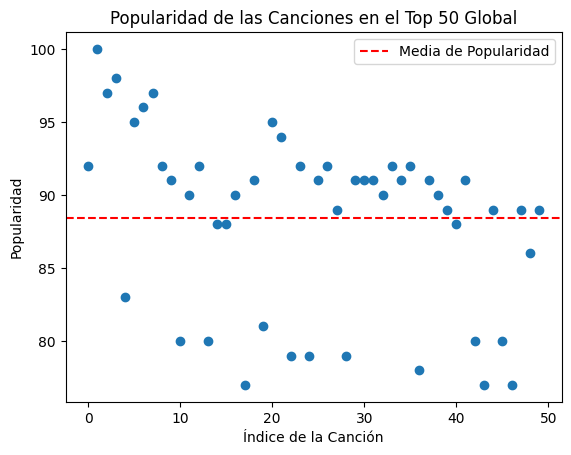

In [9]:
import matplotlib.pyplot as plt

# Calcular la media de la popularidad
mean_popularity = df_clean['Popularity'].mean()
print("La media de la popularidad es:", mean_popularity)

# Crear un gráfico de dispersión
plt.scatter(df_clean.index, df_clean['Popularity'])
plt.axhline(y=mean_popularity, color='r', linestyle='--', label='Media de Popularidad')
plt.xlabel('Índice de la Canción')
plt.ylabel('Popularidad')
plt.title('Popularidad de las Canciones en el Top 50 Global')
plt.legend()
plt.show()

Ahora, agrupemos por artista y asi saber que artista es el que mas se repite en el Top 50 de Spotify

In [10]:
import pandas as pd
# Contar la frecuencia de cada artista
artist_counts = df_clean['Artist Name'].value_counts()

# Crear un DataFrame con los artistas más frecuentes
top_artists = pd.DataFrame({'Artist': artist_counts.index, 'Count': artist_counts.values})

# Mostrar la tabla de los artistas más frecuentes
print(top_artists)


               Artist  Count
0   sabrina carpenter     11
1       billie eilish      2
2       chappell roan      2
3          charli xcx      2
4        benson boone      2
5                kapo      2
6           lady gaga      1
7         hanumankind      1
8             karol g      1
9              *nsync      1
10              jimin      1
11          shaboozey      1
12               lisa      1
13         floyymenor      1
14        teddy swims      1
15        post malone      1
16     kendrick lamar      1
17      tommy richman      1
18             hozier      1
19          sevdaliza      1
20          adam port      1
21      ariana grande      1
22                djo      1
23     arctic monkeys      1
24         lord huron      1
25        myles smith      1
26  the neighbourhood      1
27         the weeknd      1
28       taylor swift      1
29           coldplay      1
30              dasha      1
31               feid      1
32            artemas      1
33      the ki

Como podemos observar, la artista Sabrina Carpenter se repite 11 veces, esto significa que 11 canciones de la dicha artista estan en el Top, mientras que Billie Eilish, Chappel Roan, Benson Boone, y Kapo se repiten 2 veces en el Top 50 de Spotify

In [11]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Configura el renderer para Visual Studio Code
pio.renderers.default = 'vscode'

# Supón que df es tu DataFrame ya creado
fig = px.bar(df, x='Artist Name', y='Popularity', color='Artist Name',
             title='Popularidad Promedio por Artista',
             labels={'Artist Name': 'Artista', 'Popularity': 'Popularidad Promedio'})

# Muestra la figura
fig.show()

Pero podemos ver si de verdad Sabrina Carpenter es la artista mas popular en el top?. Para ello realizaremos de nuevo la agrupacion, pero esta vez, vamos a promediar la popularidad para derterminar si Sabrina Carpenter es la artista mas popular del top.

In [12]:
Agrupacion = df_clean.drop(columns=['Song Name', 'Album Name', 'Release Date'])
Agrupacion = Agrupacion.groupby('Artist Name')['Popularity'].mean().reset_index().sort_values(by=['Popularity'],ascending=False)
Agrupacion

,Artist Name,Popularity
18,karol g,96.000000
6,billie eilish,95.000000
16,jimin,95.000000
19,kendrick lamar,95.000000
34,tommy richman,94.000000
7,chappell roan,94.000000
29,taylor swift,92.000000
20,lady gaga,92.000000
23,myles smith,92.000000
14,hanumankind,92.000000


Y como se puede ver, la artista Sabrina Carpenter, no es la artista mas popular en el top, aunque igual se destaca de tener 11 canciones en el Top 50 de Spotify, en el grafico se puede ver que Karol G es la artista mas popular del top con 96pts. de popularidad, luego le siguen Kendrick Lamar con 95pts. y Jimmin con 95pts.

In [13]:
import plotly.express as px
# Configura el renderer para Visual Studio Code
pio.renderers.default = 'vscode'
fig = px.bar(Agrupacion, x='Artist Name', y = 'Popularity', color='Artist Name',
             title='Popularidad promediado ordenado por artista de forma descendiente',
             labels={'Artist Name':'Artista', 'Popularity':'Popularidad Promediada'})
fig.show()

Con este grafico podemos apreciar una evolucion de la popularidad promedio a lo largo del timepo.

In [14]:
#evolucion de pupularidad a lo largo del tiempo
pio.renderers.default = "vscode"
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%Y-%m-%d', errors='coerce')
df_grouped = df.groupby(df['Release Date'].dt.strftime('%Y-%m'))['Popularity'].mean().reset_index()
fig = px.line(df_grouped, x='Release Date', y='Popularity',
                  title='Evolución de la Popularidad a lo Largo del Tiempo',
                  labels={'Release Date': 'Fecha de Lanzamiento', 'Popularity': 'Popularidad Promedio'})
fig.show()

Aca, podemos apreciar como se correlacionan la variable artista y fecha de lanzamiento

In [15]:
# grafico de correlacion de el artista y la fecha de lanzamiento
import altair as alt
# Configura el renderer para Visual Studio Code
pio.renderers.default = 'vscode'
alt.Chart(df).mark_circle(size=60).encode(
    x='Release Date',
    y='Artist Name',
    color='Popularity',
    tooltip=['Song Name', 'Album Name', 'Popularity']
).interactive()

alt.Chart(...)

Compararemos tambien los albumes de los artistas del top 50 global al cual esta ligada su cancion de este top.

In [16]:
#grafico de album mas famoso
import altair as alt
# Ordena el DataFrame por popularidad en orden descendente
df_sorted = df.sort_values('Popularity', ascending=False)
# Crea un gráfico de barras interactivo
chart = alt.Chart(df_sorted).mark_bar().encode(
    x=alt.X('Popularity:Q', title='Popularidad'),
    y=alt.Y('Album Name:N', sort='-x', title='Álbum'),
    tooltip=['Song Name', 'Artist Name', 'Popularity']
).properties(
    title='Popularidad de Álbumes',
    width=600,
    height=400
).interactive()

chart

alt.Chart(...)

Creamos un grafico para observar la popularidad de las canciones en el top 50 global

In [17]:
# Gráfico de barras interactivo para la popularidad de las canciones
fig = px.bar(df, x='Song Name', y='Popularity',
             title='Popularidad de las Canciones en el Top 50 Global',
             labels={'Song Name': 'Canción', 'Popularity': 'Popularidad'},
             color='Popularity', color_continuous_scale='Viridis')
fig.show()

Tambien mediremos la dispercion entre la popularidad y fecha de lanzamiento

In [18]:
# Gráfico de dispersión interactivo para la popularidad vs. fecha de lanzamiento
fig = px.scatter(df, x='Release Date', y='Popularity',
                 title='Popularidad vs. Fecha de Lanzamiento',
                 labels={'Release Date': 'Fecha de Lanzamiento', 'Popularity': 'Popularidad'},
                 hover_name='Song Name', color='Artist Name')
fig.show()

Distribucion de popularidad de las canciones

In [19]:
# Histograma interactivo de la popularidad de las canciones
fig = px.histogram(df, x='Popularity',
                   title='Distribución de la Popularidad de las Canciones',
                   labels={'Popularity': 'Popularidad'},
                   nbins=10, color_discrete_sequence=['#1DB954'])
fig.show()

HAREMOS OTRO SCRAPING PARA OBTENER LA DURACION DE LAS CANCIONES, ESTO NOS AYUDARA A SABER SI HAY ALGUNA RELACION ENTRE LA DURACION DE LAS CANCIONES Y LA POPULARIDAD DE ESTAS.

In [20]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Tus credenciales de la API de Spotify (reemplázalas con tus propias credenciales)
client_id = "0e8516718fbb433f847c54fe4786f171"
client_secret = "8803d921337b47949afc64de38e7a6d4"

# Autenticación
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Obtener la duración de las canciones
song_durations = []
for index, row in df.iterrows():
    song_name = row['Song Name']
    artist_name = row['Artist Name']
    results = sp.search(q=f'track:{song_name} artist:{artist_name}', type='track')
    if results['tracks']['items']:
        duration_ms = results['tracks']['items'][0]['duration_ms']
        song_durations.append(duration_ms / 1000)  # Convertir a segundos
    else:
        song_durations.append(None)  # Si no se encuentra la canción

# Agregar la duración de las canciones al DataFrame
df['Song Duration'] = song_durations

In [21]:
df

,Song Name,Artist Name,Album Name,Release Date,Popularity,Song Duration
0,Die With A Smile,Lady Gaga,Die With A Smile,2024-08-16,92,251.667
1,BIRDS OF A FEATHER,Billie Eilish,HIT ME HARD AND SOFT,2024-05-17,100,210.373
2,Please Please Please,Sabrina Carpenter,Please Please Please,2024-06-06,97,186.365
3,Espresso,Sabrina Carpenter,Espresso,2024-04-12,98,175.459
4,Taste,Sabrina Carpenter,Short n' Sweet,2024-08-23,83,157.279
5,Who,Jimin,MUSE,2024-07-19,95,170.887
6,Si Antes Te Hubiera Conocido,KAROL G,Si Antes Te Hubiera Conocido,2024-06-21,96,195.824
7,"Good Luck, Babe!",Chappell Roan,"Good Luck, Babe!",2024-04-05,97,218.423
8,Big Dawgs,Hanumankind,Big Dawgs,2024-07-09,92,190.666
9,Beautiful Things,Benson Boone,Fireworks & Rollerblades,2024-04-05,91,180.304


In [22]:
import pandas as pd
# Guardamos el DataFrame como un archivo CSV
df.to_csv('top50_global(SONG DURATION ADD).csv', index=False)

In [23]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('top50_global(SONG DURATION ADD).csv')

# Display the DataFrame
print(df)

                                            Song Name        Artist Name  \
0                                    Die With A Smile          Lady Gaga   
1                                  BIRDS OF A FEATHER      Billie Eilish   
2                                Please Please Please  Sabrina Carpenter   
3                                            Espresso  Sabrina Carpenter   
4                                               Taste  Sabrina Carpenter   
5                                                 Who              Jimin   
6                        Si Antes Te Hubiera Conocido            KAROL G   
7                                    Good Luck, Babe!      Chappell Roan   
8                                           Big Dawgs        Hanumankind   
9                                    Beautiful Things       Benson Boone   
10                                        Good Graces  Sabrina Carpenter   
11  Bye Bye Bye - From Deadpool and Wolverine Soun...             *NSYNC   
12          

In [24]:
# Eliminar filas con duración nula (si las hay)
df = df.dropna(subset=['Song Duration'])


Creamos grafico de dispersion para ver la relacion entre la popularidad y la duracion de la cancion.

In [25]:
# CreaMOS el gráfico de dispersión
import plotly.express as px
fig = px.scatter(df, x='Song Duration', y='Popularity', #RELACION DE DURACION Y POPULARIDAD
                     title='Relación entre Duración y Popularidad',
                     labels={'Song Duration': 'Duración de la Canción (segundos)', 'Popularity': 'Popularidad'})
fig.show()

Calculamos la duracion media de las canciones

In [26]:
# Calcula la duración media de las canciones
average_duration = df['Song Duration'].mean()

# Crea un gráfico de puntos para mostrar la duración media
fig = px.scatter(x=['Duración Media'], y=[average_duration],
                 title='Duración Media de las Canciones',
                 labels={'x': '', 'y': 'Duración (segundos)'})

# Personaliza el marcador para que sea más visible
fig.update_traces(marker=dict(size=15, color='#1DB954'))

fig.show()

Nube de palabras mas frecuentes en las letras

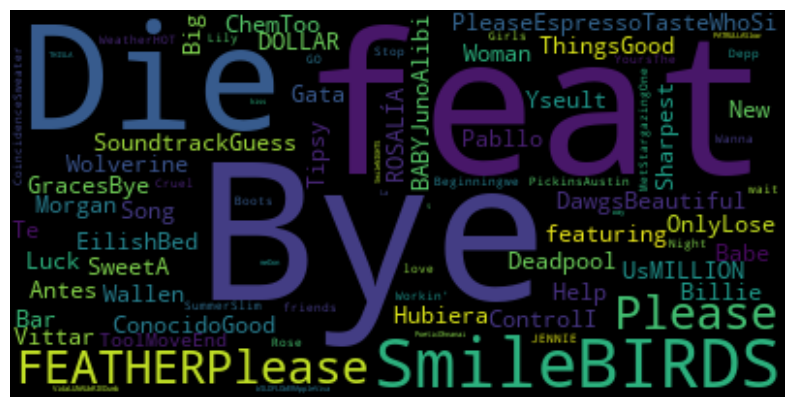

In [27]:
from wordcloud import WordCloud
text = ''.join(df['Song Name'])
wordcloud = WordCloud().generate(text)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()